In [1]:
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [4]:
# Store filepath in a variable
file4_df = "resources_update/measles.csv"


In [5]:
# Read our Data file with the pandas library
file1_df = pd.read_csv(file4_df, encoding="ISO-8859-1")


In [6]:
# Show just the header
file1_df.head()

,Unnamed: 0,state,State Name,disease,Number of Measles Cases,"Measles Incidence Per 100,000 People",year,number_week
0,0,AL,ALABAMA,MEASLES,97,3.67,1928,1
1,1,AR,ARKANSAS,MEASLES,76,4.11,1928,1
2,2,AZ,ARIZONA,MEASLES,8,1.90,1928,1
3,3,CA,CALIFORNIA,MEASLES,74,1.38,1928,1
4,4,CO,COLORADO,MEASLES,85,8.38,1928,1


In [7]:
file2_df = file1_df.groupby(["State Name", "year"])
mean_grouped_measles_df = file2_df.mean()
mean_grouped_measles_df.head()


Unnamed: 0  Number of Measles Cases  \
State Name year                                         
ALABAMA    1928  1082.115385               170.057692   
           1929  3207.571429                60.387755   
           1930  5442.980769                79.923077   
           1931  7590.346939               182.326531   
           1932  9726.414634                 6.585366   

                 Measles Incidence Per 100,000 People  number_week  
State Name year                                                     
ALABAMA    1928                              6.442115    26.500000  
           1929                              2.284286    25.448980  
           1930                              3.019231    26.500000  
           1931                              6.883469    25.612245  
           1932                              0.249024    24.682927

In [8]:
#Drop columns
file3_df = mean_grouped_measles_df.drop(columns=['Unnamed: 0', 'Number of Measles Cases', 'number_week'])
file3_df.head()

Measles Incidence Per 100,000 People
State Name year                                      
ALABAMA    1928                              6.442115
           1929                              2.284286
           1930                              3.019231
           1931                              6.883469
           1932                              0.249024

In [9]:
#Grab the data contained within the "AL" row and "cases" column
ALdf = file3_df.loc["ALABAMA", "Measles Incidence Per 100,000 People"]
ALdf.head()

year
1928    6.442115
1929    2.284286
1930    3.019231
1931    6.883469
1932    0.249024
Name: Measles Incidence Per 100,000 People, dtype: float64

In [10]:
#Grab the data contained within the "CA" row and "cases" column
CAdf = file3_df.loc["CALIFORNIA", "Measles Incidence Per 100,000 People"]
CAdf.head()

year
1928     1.331154
1929     1.400000
1930    14.620000
1931     9.182308
1932     4.116923
Name: Measles Incidence Per 100,000 People, dtype: float64

In [11]:
# Calculate the mean of mean of mean number of cases of measles in AL
ALdf.mean()


2.1647578052505208

In [12]:
# Calculate the mean of mean of mean number of cases of measles in CA
CAdf.mean()

3.790922973160298

In [13]:
#Calculate Independent (Two Sample) T-Test
stats.ttest_ind(ALdf, CAdf, equal_var=False)

Ttest_indResult(statistic=-2.378821925523624, pvalue=0.01897091425323584)

In [14]:
#inner join in python pandas
state_df = pd.merge(ALdf, CAdf, on='year', how='inner')
state_df.head()

,"Measles Incidence Per 100,000 People_x","Measles Incidence Per 100,000 People_y"
year,,
1928,6.442115,1.331154
1929,2.284286,1.400000
1930,3.019231,14.620000
1931,6.883469,9.182308
1932,0.249024,4.116923


In [25]:
state_df.rename(columns={'Measles Incidence Per 100,000 People_x': 'AL', 'Measles Incidence Per 100,000 People_y': 'CA'})
state_df.head()

,AL,CA
year,,
1928,6.442115,1.331154
1929,2.284286,1.400000
1930,3.019231,14.620000
1931,6.883469,9.182308
1932,0.249024,4.116923


In [27]:
STATEdf = state_df.reset_index()
STATEdf.head()

,year,AL,CA
0,1928,6.442115,1.331154
1,1929,2.284286,1.400000
2,1930,3.019231,14.620000
3,1931,6.883469,9.182308
4,1932,0.249024,4.116923


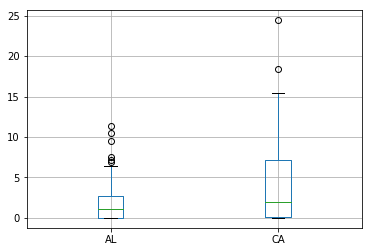

In [32]:
# Box Plot

STATEdf.boxplot(column=["AL", "CA"]) 